In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import time

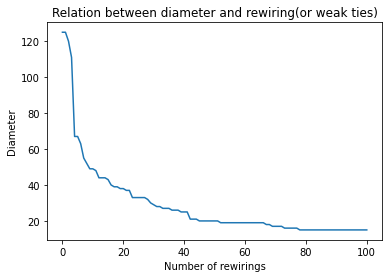

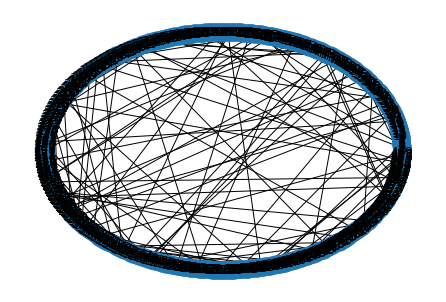

In [ ]:
#1D watts strogatzs model : ring

def make_graph(n):
  g=nx.Graph()
  g.add_nodes_from(range(0,n))
  nodes=list(g.nodes())
  for i in nodes:
    if i<n-2 : 
      g.add_edge(nodes[i],nodes[i+1])
      g.add_edge(nodes[i],nodes[i-1])
      g.add_edge(nodes[i],nodes[i+2])
      g.add_edge(nodes[i],nodes[i-2])
    if i==n-2: g.add_edge(nodes[i],nodes[i+1])
  return g


def rewire(g,percent):
  '''rewires percent % of the edges'''
  X,Y=[0,],[nx.diameter(g),]
  c=1
  per_edg_len=int(len(list(g.edges()))*(percent/100))
  for i in range(per_edg_len):
      #g.remove_edge(i[0],i[1])  #we can ignore removing for a really large network
      v1,v2=random.sample(list(g.nodes()), 2)
      g.add_edge(v1,v2)
      X.append(c)
      Y.append(nx.diameter(g))
      c+=1
  return g,X,Y

def plot_relation(x,y,xl="xlabel",yl="ylabel",title="tiltle"):
  plt.plot(x, y)
  plt.xlabel(xl)  
  plt.ylabel(yl)
  plt.title(title)  
  plt.show() 

n=500
G=make_graph(n)
G,X,Y=rewire(G,10)
plot_relation(X,Y,"Number of rewirings","Diameter","Relation between diameter and rewiring(or weak ties)")
nx.draw_circular(G,with_labels=True)
#for i in G.nodes():
#  print(i,list(G.neighbors(i)))

#decentralised search on 1d watts strogatzs model

 myopic search

 myopia : shortsightedness (or greedy approach)

 start from the SOURCE node and then go to the node that is geographically closest to the TARGET node that is a neighbor of SOURCE and the do the same until we reach the TARGET.

  myopic search != optimal search

In [ ]:
def myopic_search(g,source,target):
  if source==target: return [source,]
  else: 
    n=len(list(g.nodes()))
    next_source=list(g.neighbors(source))[0]
    for i in g.neighbors(source):
      if min(abs(i-target),abs(n+i-target))<=min(abs(next_source-target),abs(n+next_source-target)): next_source=i
      #print(next_source)
    #print()
    return [source]+myopic_search(g,next_source,target)


m=10000
c=0
c1=0
for i in range(m):
  source,target=random.randint(0,n-1),random.randint(0,n-1)
  #source,target=11,19
  #print(source,target)
  l=myopic_search(G,source,target)
  #print(l)
  steps=len(l)-1
  c+=steps
  c1+=len(nx.shortest_path(G,source,target))
  #print("Steps : ",steps)


print("Average Steps (myopic): ", c/m)
print()
print("Average Steps (optimal): ", c1/m)

Average Steps (myopic):  19.9166

Average Steps (optimal):  8.0317


#relation between percentage of weak ties and average time for myopic search for exactly opposite node pairs

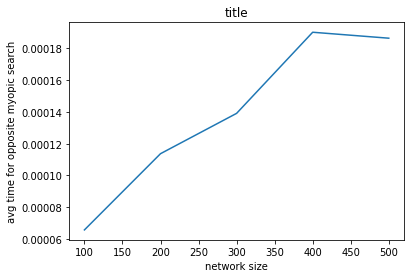

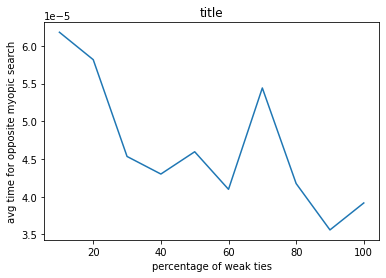

In [ ]:
def avg_time_opposite_ms(g):
  n=len(list(g.nodes()))
  tsum=0
  for i in range(int(n/2)):
    a=time.time()
    myopic_search(g,i,i+n//2)
    b=time.time()
    tsum+=(b-a)
  return tsum/int(n/2)

def time_opposite_dif_network_size():
  X,Y=[],[]
  for i in range(100,501,100):
    G=make_graph(i) 
    G,x,y=rewire(G,10)
    X+=[i]
    Y+=[avg_time_opposite_ms(G)]
  return  X,Y

def time_opposite_dif_percent(n):
  X,Y=[],[]
  for i in range(10,101,10):
    G=make_graph(n) 
    G,x,y=rewire(G,i)
    X+=[i]
    Y+=[avg_time_opposite_ms(G)]
  return X,Y

x,y=time_opposite_dif_network_size()
plot_relation(x,y,"network size","avg time for opposite myopic search","title")
x,y=time_opposite_dif_percent(100)
plot_relation(x,y,"percentage of weak ties","avg time for opposite myopic search","title")

#k shell decomposition

core 1 : [2, 3, 4, 6, 7, 8, 9, 17, 1, 5]
core 2 : [11, 10, 12]
core 3 : [13, 14, 15, 16]


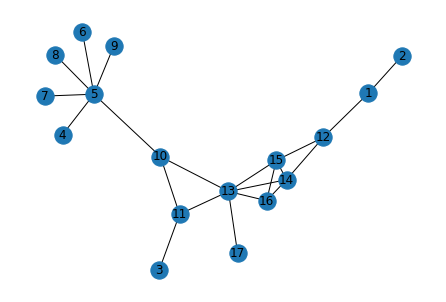

In [ ]:
def make_the_graph():
  g=nx.Graph()
  g.add_edges_from([(1,2),(3,11),(4,5),(5,6),(5,7),(5,8),(5,9),(5,10),(10,11),(10,13),(11,13),(12,14),(12,15),(13,14),(13,15),(13,16),(13,17),(14,15),(14,16),(15,16),(1,12)])
  return g

def k_shell_decomp(g):
  cores_list=[]
  core_num=1
  while list(g.nodes())!=[]:
    core=[]
    while is_degree(g,core_num):
      nodes=list(g.nodes())
      for i in nodes:
        if g.degree(i)<=core_num: 
          core+=[i]
          g.remove_node(i)
    cores_list+=[core]
    core_num+=1
  return cores_list

def is_degree(g,x):
  for i in g.nodes():
    if g.degree(i)==x: return True
  return False


G=make_the_graph()
nx.draw(G,with_labels=True)

l=k_shell_decomp(G)
for i in range(len(l)): print("core",i+1,":",l[i])

#disease model
#independent cascade model

infected nodes :  [1, 5, 9, 0, 17, 11, 12, 15, 10, 7, 13]


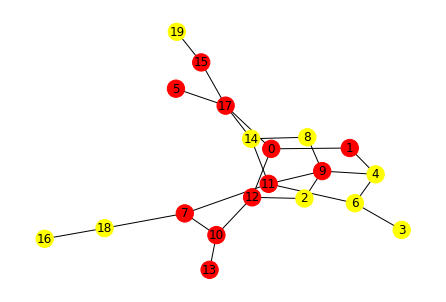

In [ ]:
def ind_cas_mod(g,seed,p):
  infected_set=seed.copy()
  while True:
    temp=[]
    for i in seed:
      for j in g.neighbors(i):
        if random.random()<=p and (j not in infected_set and j not in temp): temp+=[j]
    if temp==[]: break
    infected_set+=temp
    seed=temp.copy()
  return infected_set

def get_color(G,infected_nodes):
  l=[]
  for i in G.nodes():
    if i in infected_nodes: l.append("red")
    else: l.append("yellow")
  return l


n,p=20,0.1
G=nx.fast_gnp_random_graph(n, p)
c=0
while not nx.is_connected(G): G,c=nx.fast_gnp_random_graph(n, p),c+1
#print(c)


infected_nodes=ind_cas_mod(G,[1,5,9],0.5)
print("infected nodes : ",infected_nodes)
nx.draw(G,with_labels=True,node_color=get_color(G,infected_nodes))

In [ ]:
print(len(G.edges()))
print((n+1)*n/2)
print(len(G.edges())/((n+1)*n/2)*100)

24
210.0
11.428571428571429


#comparing influencial power and 4 different centrality measures  

degree :       [0, 3, 7, 8, 4, 5, 6, 11, 12, 9, 15, 1, 2, 13, 14, 17, 10, 16, 19, 18]
closeness :    [0, 8, 5, 7, 3, 12, 11, 6, 13, 15, 4, 9, 14, 16, 1, 2, 17, 18, 19, 10]
betweenness :  [0, 11, 8, 12, 7, 5, 3, 4, 6, 13, 2, 9, 16, 19, 17, 14, 15, 1, 10, 18]
core :         [0, 3, 5, 7, 8, 15, 1, 2, 4, 6, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19]
influence :    [0, 8, 3, 7, 5, 6, 12, 15, 4, 11, 9, 14, 17, 13, 10, 1, 2, 18, 19, 16]


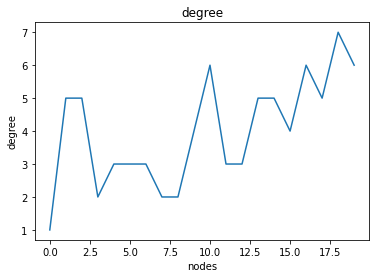

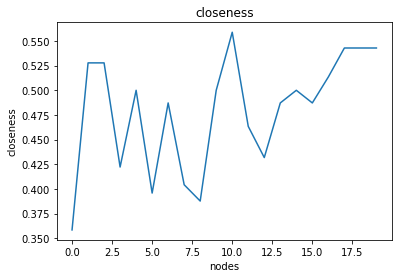

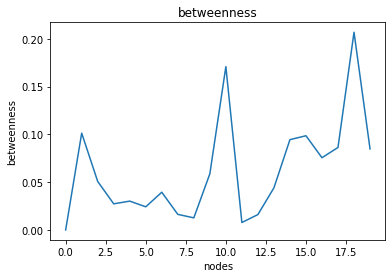

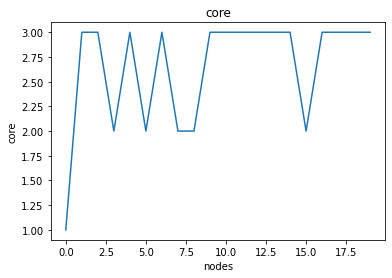

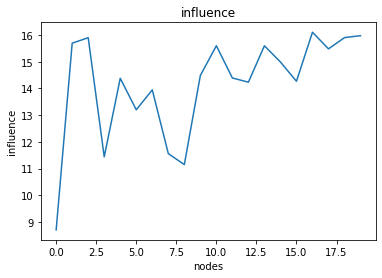

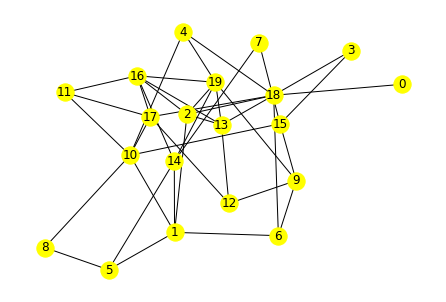

In [ ]:
def make_random_connected_graph(n=20,p=0.2):
  G=nx.fast_gnp_random_graph(n, p)
  while not nx.is_connected(G): G=nx.fast_gnp_random_graph(n, p)
  return G

def avg_influence(g,seed):
  c=0
  for i in range(10**3):
    infected_nodes=ind_cas_mod(g,seed,0.5)
    c+=len(infected_nodes)
  return c/(10**3)

def plot_relation(x,y,xl="xlabel",yl="ylabel",title="tiltle"):
  plt.plot(x, y)
  plt.xlabel(xl)  
  plt.ylabel(yl)
  plt.title(title)  
  plt.show() 


g=make_random_connected_graph()

degree,closeness,betweenness,core,influence={},{},{},{},{}
for i in g.nodes():
  degree[i]=g.degree(i)
  closeness[i]=nx.closeness_centrality(g,i)
  influence[i]=avg_influence(g,[i,])
core=nx.core_number(g)
betweenness=nx.betweenness_centrality(g)

#sorting the dictionaries

sorted_degree=dict(sorted(degree.items(), key=lambda x:x[1]))
sorted_closeness=dict(sorted(closeness.items(), key=lambda x:x[1]))
sorted_betweenness=dict(sorted(betweenness.items(), key=lambda x:x[1]))
sorted_core=dict(sorted(core.items(), key=lambda x:x[1]))
sorted_influence=dict(sorted(influence.items(), key=lambda x:x[1]))


print("degree :      ",list(sorted_degree.keys()))
print("closeness :   ",list(sorted_closeness.keys()))
print("betweenness : ",list(sorted_betweenness.keys()))
print("core :        ",list(sorted_core.keys()))
print("influence :   ",list(sorted_influence.keys()))


plot_relation(list(degree.keys()),list(degree.values()),xl="nodes",yl="degree",title="degree")
plot_relation(list(closeness.keys()),list(closeness.values()),xl="nodes",yl="closeness",title="closeness")
plot_relation(list(betweenness.keys()),list(betweenness.values()),xl="nodes",yl="betweenness",title="betweenness")
plot_relation(list(core.keys()),list(core.values()),xl="nodes",yl="core",title="core")
plot_relation(list(influence.keys()),list(influence.values()),xl="nodes",yl="influence",title="influence")


nx.draw(g,with_labels=True,node_color="yellow")


{0: 4, 1: 4, 2: 4, 3: 4, 4: 4}


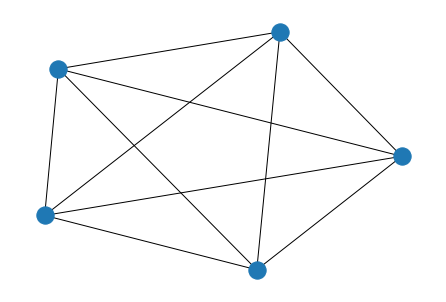

In [ ]:
G=make_random_connected_graph(n=5,p=1) 
print(nx.core_number(G))
nx.draw(G)